In [1]:
flows = [50,50,1050]
period = [1,2,3]
flowsPV = [x/(1.08)**y for x,y in zip(flows,period)]
print(flowsPV)
print(sum(flowsPV))

[46.29629629629629, 42.86694101508916, 833.5238530711781]
922.6870903825636


In [2]:
weights = [x/922.6870903825636 for x in flowsPV]
print(weights)

[0.05017551104687177, 0.04645880652488127, 0.9033656824282469]


In [3]:
weightedYears = [x*y for x,y in zip(weights,period)]
print(weightedYears)
print(sum(weightedYears))

[0.05017551104687177, 0.09291761304976254, 2.7100970472847408]
2.853190171381375


In [4]:
def duration(couponRate,periods,r):
    flows = [couponRate]*periods
    flows[-1]+=1
    periodsAr = list(range(1,periods+1))
    pv = [x/(1+r)**y for x,y in zip(flows,periodsAr)]
    price = sum(pv)
    weights = [x/price for x in pv]
    duration = sum([x*y for x,y in zip(periodsAr,weights)])
    return duration
duration(.05,3,.08)

2.853190171381375

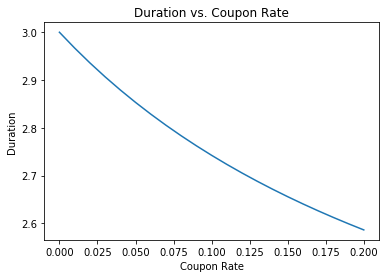

In [5]:
import matplotlib.pyplot as plt
couponRate = [x/100 for x in range(0,21)]
durationAr = [duration(x,3,.08) for x in couponRate]
plt.plot(couponRate,durationAr)
plt.xlabel("Coupon Rate")
plt.ylabel("Duration")
plt.title("Duration vs. Coupon Rate")
plt.show()

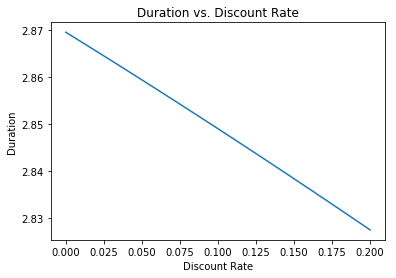

In [6]:
import matplotlib.pyplot as plt
r = [x/100 for x in range(0,21)]
durationAr = [duration(.05,3,x) for x in r]
plt.plot(couponRate,durationAr)
plt.xlabel("Discount Rate")
plt.ylabel("Duration")
plt.title("Duration vs. Discount Rate")
plt.show()

In [7]:
def bondValue(r,fv,year,cr):
    final_pay = fv/(1+r)**year
    coupon_payment = (fv*cr)
    annuity_value = coupon_payment*(1-(1+r)**(-year))/r
    return annuity_value+final_pay
p1 = bondValue(.08,1000,3,.05)
p2 = bondValue(.082,1000,3,.05)
print(p1)
print(p2)
print((p2-p1)/p1)

922.6870903825636
917.829598293161
-0.005264506396625337


In [8]:
d = duration(.05,3,.08)
print(-d/(1.08)*.002)

-0.005283685502558101


In [9]:
print((p1*d)/(900*6))
print((p1*d)/(6))

0.4875188402851868
438.76695625666815
